In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.data import FullImageDataset
from src.metrics import calculate_dice, calculate_iou
from src.utils import apply_watershed

In [2]:
batch_size = 50

train_dataset = FullImageDataset(
    '../data/processed/train/img',
    '../data/processed/train/mask',
)

val_dataset = FullImageDataset(
    '../data/processed/val/img',
    '../data/processed/val/mask',
)

test_dataset = FullImageDataset(
    '../data/processed/test/img',
    '../data/processed/test/mask',
)

<tifffile.TiffFile 'otherspecimen_3.tif'> shaped series shape does not match page shape


Succesfully loaded 38 images
Succesfully loaded 4 images
Succesfully loaded 37 images


In [3]:
def get_dice(threshold, dataset, normalize=True):
    dice = []
    for img, mask in dataset:
        if normalize:
            img = img/np.max(img)
        pred = img > threshold
        dice.append(calculate_dice(mask.astype(bool), pred.astype(bool)))
    return np.mean(dice)

In [4]:
values = []
for threshold in range(100):
    values.append(get_dice(threshold/100, train_dataset, normalize=True))

In [5]:
threshold = np.argmax(values)/100

print(f"train dice: {get_dice(threshold, train_dataset)}")
print(f"val dice: {get_dice(threshold, val_dataset)}")


train dice: 0.9130730966498082
val dice: 0.9004406545984814


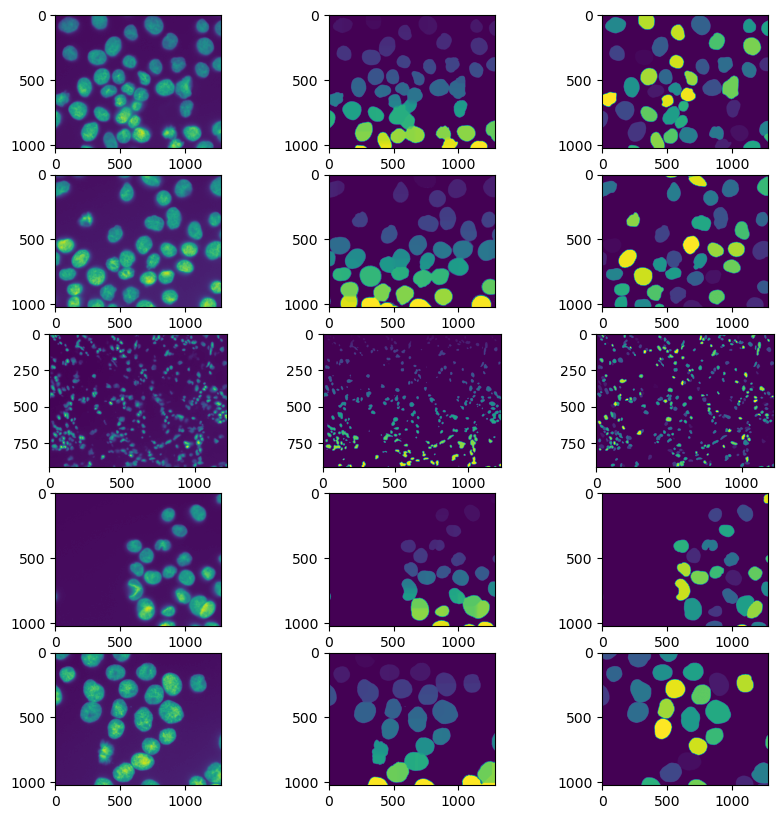

In [6]:
img, mask = train_dataset[0]
fig, axes = plt.subplots(5, 3, figsize=(10, 10))

for row in range(5):
    img, mask = train_dataset[row]
    img /= np.max(img)
    pred = apply_watershed(img[0] > threshold)
    axes[row, 0].imshow(img[0])
    axes[row, 1].imshow(pred)
    axes[row, 2].imshow(mask[0])